In [1]:
import pandas as pd
import matplotlib as plot


covid_df = pd.read_csv('data/covid_df.csv')

✍ Дальнейшая работа будет проводиться с таблицей covid_df — результатом объединения таблиц covid_data и vaccinations_data.

Оказывается, за способами визуализации данных не нужно далеко ходить. 
Базовую (примитивную) визуализацию можно выполнить с помощью уже знакомой нам библиотеки Pandas. 
Функционал для создания основных типов графиков уже включён в библиотеку. 
С изучения возможностей Pandas мы и начнём наше погружение в программную визуализацию.

Примечание. Для визуализации **Pandas** использует библиотеку **matplotlib**, о которой мы поговорим в следующем юните. Если попробовать воспользоваться методами визуализации Pandas без предварительной установки matplotlib, вы получите ошибку ImportError. Для установки библиотеки используется стандартная команда, которую нужно выполнить в терминале:

*pip install matplotlib*
или в ячейке ноутбука:
*! pip install matplotlib*

### Базовая визуализация в Pandas

Основным методом для создания простейших графиков в Pandas является [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

Основные параметры метода **plot()**

- *x* — название признака, который будет отложен по оси абсцисс;
- *y* — название признака, который будет отложен по оси ординат;
- *figsize* — размер графика (кортеж из ширины и высоты в дюймах);
- *kind* —тип визуализации. Основные типы:
    - 'line' — линейный график (по умолчанию);
    - 'bar' — столбчатая диаграмма;
    - 'barh' — горизонтальная столбчатая диаграмма;
    - 'hist' — гистограмма;
    - 'box' — коробчатая диаграмма (boxplot);
    - 'pie' — круговая диаграмма;
    - 'scatter' — диаграмма рассеяния.
  
Давайте попрактикуемся в использовании метода plot().

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

*Примечание*. Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная **grouped_cases** — это объект **Series**.

***plot() может являться методом объекта типа DataFrame или Series***. При типе DataFrame требуется указать х и у, либо будут построены графики всех столбцов. При типе Series в этом нет необходимости, ведь это и так всего один столбец данных (у) с индексами (х).

При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), а по оси ординат (у) — значения показателей.

Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать и посмотрите, что будет).

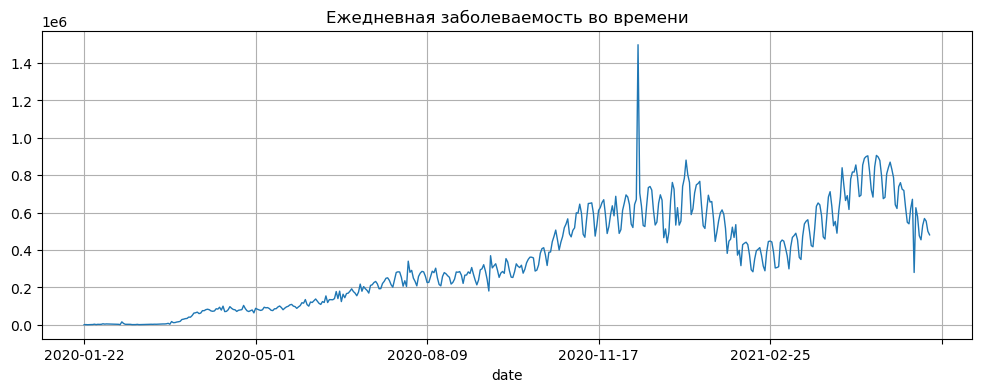

In [11]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=1
);

На графике выше отчётливо виден умеренный начальный рост заболеваемости, после чего наблюдается её резкое повышение в середине октября 2020 года, а в декабре 2020 года — аномальная вспышка коронавируса (зафиксировано более 1.4 млн. заболевших в день). Такой резкий максимум, возможно, является ошибкой в данных и требует более детального разбора. Далее заметно постепенное уменьшение числа ежедневно фиксируемых случаев и наступление второй волны в марте 2021 года. Наконец, начиная с мая 2021 года наблюдается очередной спад.

Пилообразность графика (подъёмы и спады с периодом в 7 дней) может быть связана с рабочими и выходными днями.

Нам неизвестно, как устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что:

спад в выходные обусловлен меньшей интенсивностью работы медицинских служб;
в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берётся/проводится меньше тестов, к понедельнику они ещё не готовы и диагноз ещё не поставлен;
минимум в понедельник может быть запаздыванием подсчёта статистики, т.е. на самом деле данные за понедельник — это данные за воскресенье.

*Теперь построим гистограмму*, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

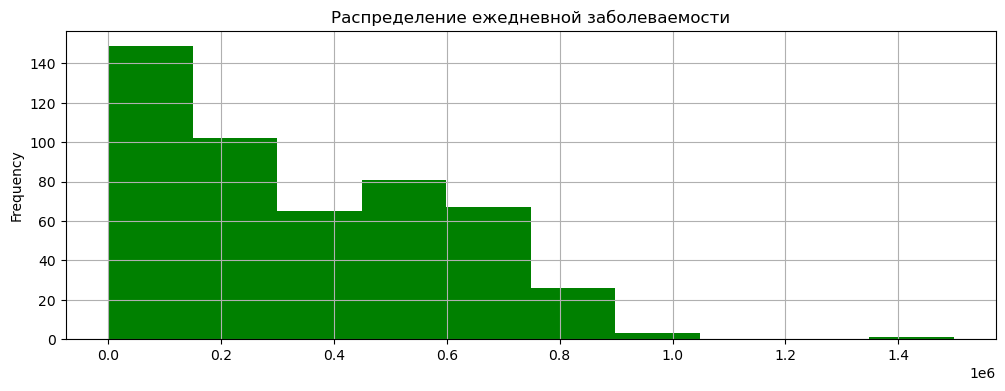

In [26]:
grouped_cases.plot(
    kind='hist',
    figsize=(12, 4),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'green',
    bins=10
);

По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек), разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

Мы видим модальное значение около нуля (от 0 до примерно 150 тыс. заболеваний в день), то есть большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.
В глаза бросается «пенёк», соответствующий резкой вспышке заболеваемости, которую мы видели ранее. Его высота очень мала, ведь такое наблюдение единственное. Даже на гистограмме кажется, что данное наблюдение является аномальным и, скорее всего, представляет собой выброс.

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

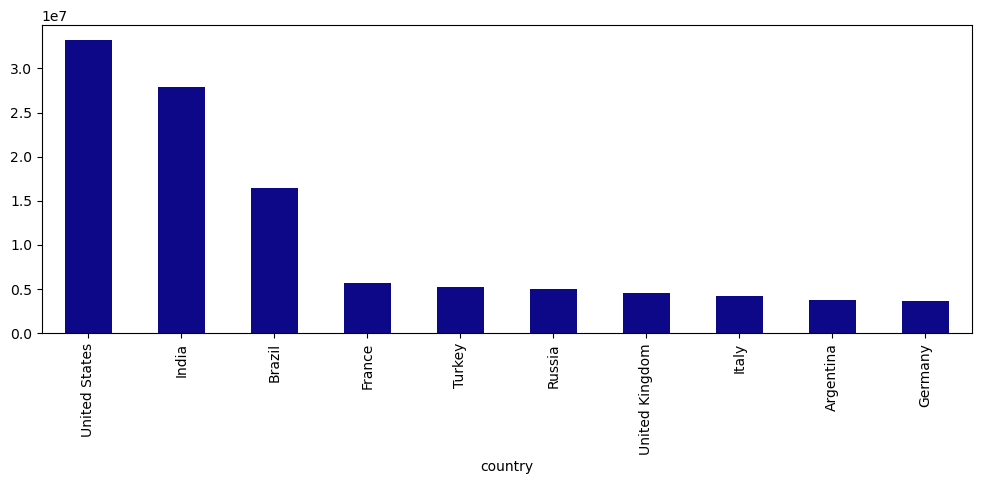

In [4]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=False,
    figsize=(12, 4),
    colormap='plasma'
);

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

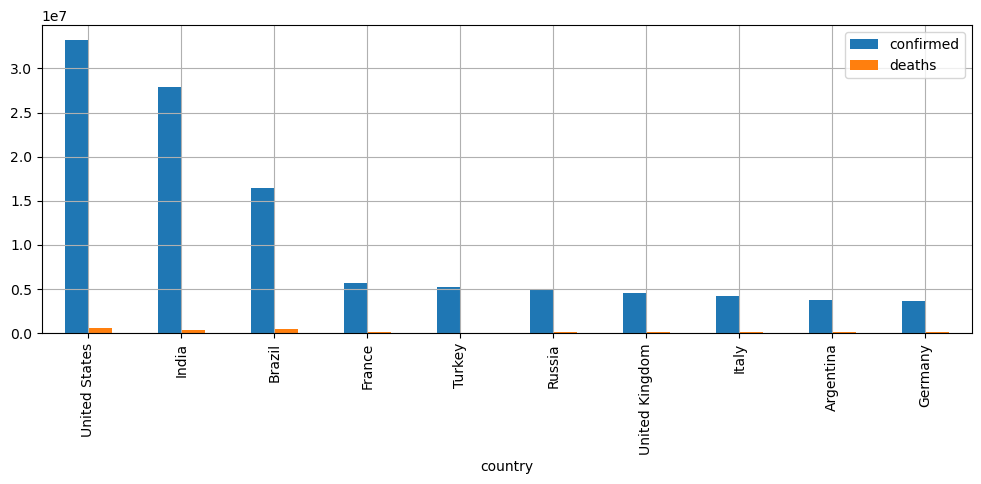

In [10]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     
                     kind='bar',     
                     grid=True,     
                     figsize=(12, 4), 
                     );

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить такой график сами!

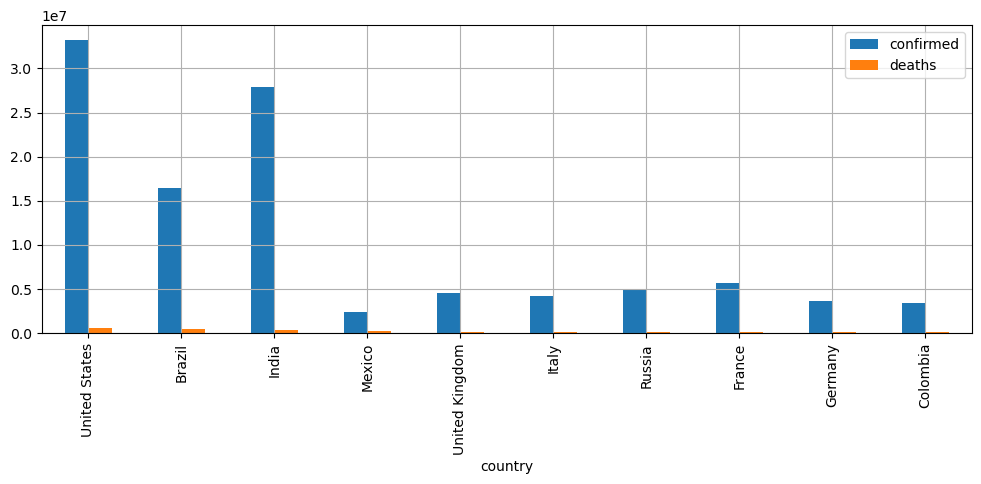

In [11]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot(     
                     kind='bar',     
                     grid=True,     
                     figsize=(12, 4), 
                     );

Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить «здесь и сейчас», не сильно заботясь об их внешнем виде. Однако такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации — довольно ограниченный функционал:

С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации Pandas не подходит.
- рудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах.
- Сложно (иногда и вовсе невозможно) корректировать внешний вид графика.
- Отсутствует 3D-визуализация.

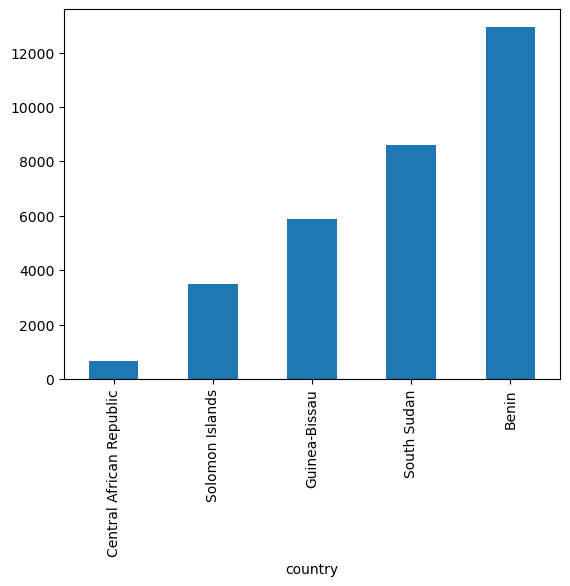

In [12]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');